In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from keras import Sequential

In [26]:
data=pd.read_csv(r"C:\Users\sairam\Downloads\merged dataset.csv")
data.head()

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,COMP,...,gpsSpeed,gpsQuality,month,day,hour,minute,second,fault,location,output
0,1247481,-0.008,8.598,8.604,-0.026,1.696,59.925,18.853406,0.0000,1.0,...,0.0,1.0,1,18,12,31,4,2,3,3
1,1078410,-0.006,9.572,9.580,-0.024,1.708,73.000,19.030938,3.7825,1.0,...,0.0,0.0,1,16,1,33,16,2,3,3
2,1507241,-0.008,9.874,9.880,-0.026,1.704,72.275,19.030938,3.7775,1.0,...,0.0,1.0,1,22,0,57,55,2,3,3
3,598571,-0.008,9.678,9.680,-0.028,1.612,70.000,19.040281,3.7600,1.0,...,29.0,1.0,1,9,12,16,3,2,3,3
4,726390,-0.006,9.818,9.824,-0.026,1.594,72.850,19.030938,3.9350,1.0,...,0.0,1.0,1,11,7,46,20,2,3,3


In [27]:
data['gpsQuality'].value_counts()

gpsQuality
1.0    1687291
0.0    1524813
Name: count, dtype: int64

In [28]:
data['fault'].value_counts()

fault
2    3000000
1     195484
0      16620
Name: count, dtype: int64

In [29]:
data['location'].value_counts()

location
3    3000000
2     195484
1      14821
0       1799
Name: count, dtype: int64

In [30]:
data=data.drop(['Unnamed: 0','output'],axis=1)
data.head()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,COMP,DV_eletric,...,gpsLat,gpsSpeed,gpsQuality,month,day,hour,minute,second,fault,location
0,-0.008,8.598,8.604,-0.026,1.696,59.925,18.853406,0.0000,1.0,0.0,...,41.1882,0.0,1.0,1,18,12,31,4,2,3
1,-0.006,9.572,9.580,-0.024,1.708,73.000,19.030938,3.7825,1.0,0.0,...,0.0000,0.0,0.0,1,16,1,33,16,2,3
2,-0.008,9.874,9.880,-0.026,1.704,72.275,19.030938,3.7775,1.0,0.0,...,41.2123,0.0,1.0,1,22,0,57,55,2,3
3,-0.008,9.678,9.680,-0.028,1.612,70.000,19.040281,3.7600,1.0,0.0,...,41.1524,29.0,1.0,1,9,12,16,3,2,3
4,-0.006,9.818,9.824,-0.026,1.594,72.850,19.030938,3.9350,1.0,0.0,...,41.2136,0.0,1.0,1,11,7,46,20,2,3


In [44]:
y1=data['fault']
y2=data['location']
y3=data['gpsQuality']
x=data.drop(['fault','location','gpsQuality'],axis=1)

In [45]:
for i in x.columns:
    x[i]=(x[i]-np.min(x[i]))/(np.max(x[i])-np.min(x[i]))
x.describe()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,COMP,DV_eletric,...,Oil_level,Caudal_impulses,gpsLong,gpsLat,gpsSpeed,month,day,hour,minute,second
count,3.212104e+06,3.212104e+06,3.212104e+06,3.212104e+06,3.212104e+06,3.212104e+06,3.212104e+06,3.212104e+06,3.212104e+06,3.212104e+06,...,3.212104e+06,3.212104e+06,3.212104e+06,3.212104e+06,3.212104e+06,3.212104e+06,3.212104e+06,3.212104e+06,3.212104e+06,3.212104e+06
mean,1.023738e-01,8.603844e-01,7.497095e-01,1.749127e-03,2.593932e-01,6.148196e-01,3.998019e-01,2.323028e-01,8.754225e-01,1.245835e-01,...,1.512554e-01,1.524767e-01,5.030387e-01,5.157880e-01,1.764062e-02,5.222644e-01,4.951628e-01,5.646238e-01,4.996437e-01,4.998401e-01
std,2.745134e-01,7.334858e-02,2.867305e-01,1.737905e-02,2.574555e-01,8.109832e-02,1.872237e-01,2.271283e-01,3.302393e-01,3.302460e-01,...,3.582977e-01,3.594824e-01,4.724406e-01,4.903258e-01,4.091780e-02,3.437805e-01,3.029212e-01,2.843427e-01,2.937239e-01,2.935419e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.833853e-03,8.144588e-01,7.924962e-01,7.262164e-04,1.418640e-01,5.604527e-01,4.370500e-01,1.804589e-03,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,5.158076e-02,0.000000e+00,0.000000e+00,2.000000e-01,2.333333e-01,3.478261e-01,2.372881e-01,2.372881e-01
50%,2.017238e-03,8.619496e-01,8.407351e-01,1.210361e-03,1.549367e-01,6.283502e-01,4.385774e-01,3.810260e-01,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,6.424484e-02,9.809914e-01,0.000000e+00,6.000000e-01,5.000000e-01,5.652174e-01,4.915254e-01,4.915254e-01
75%,2.200624e-03,9.107864e-01,8.922282e-01,1.694505e-03,1.610886e-01,6.745086e-01,4.429413e-01,3.957205e-01,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,9.818685e-01,0.000000e+00,8.000000e-01,7.666667e-01,7.826087e-01,7.457627e-01,7.457627e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [33]:
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler
#over1=SMOTE(sampling_strategy={0:198000, 1:198000})
#under1 = RandomUnderSampler({2:198000})
#over2=SMOTE(sampling_strategy={0:198000, 1:198000,2:198000})
#under2 = RandomUnderSampler({3:198000})
#from imblearn.pipeline import Pipeline
#pipeline1 = Pipeline([('o', over1), ('u', under1)])
#pipeline2 = Pipeline([('o', over2), ('u', under2)])
#x,y1=pipeline1.fit_resample(x,y1)
#x,y2=pipeline1.fit_resample(x,y2)

In [46]:
from tensorflow.keras.utils import to_categorical
y1=to_categorical(y1,num_classes=4)
y2=to_categorical(y2,num_classes=4)
y3=to_categorical(y3,num_classes=2)

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train1,y_test1,y_train2,y_test2,t_train3,y_test3=train_test_split(x,y1,y2,y3,stratify=y1,test_size=.2)

In [48]:
np.unique(y_test1),np.unique(y_test2),np.unique(y_test3)

(array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32))

In [49]:
np.unique(y_train1),np.unique(y_train2),np.unique(t_train3)

(array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32))

In [50]:
inputs = tf.keras.layers.Input(shape=([24]), name='input')
main_branch=tf.keras.layers.Dense(16,activation='relu',name='shared_hidden')(inputs)
main_branch_1=tf.keras.layers.BatchNormalization(name='shared_regularization_1')(main_branch)
main_branch_2=tf.keras.layers.GaussianNoise(0.15,name='shared_regularization_2')(main_branch_1)
task_1_op = tf.keras.layers.Dense(4, activation='softmax', name='fault_output')(main_branch_2)

task_2_out= tf.keras.layers.Dense(4,activation='relu',name='hidden_location')(main_branch_2)
task_2_op = tf.keras.layers.Dense(4, activation='softmax', name='location_output')(task_2_out)

task_3_op = tf.keras.layers.Dense(2, activation='softmax', name='gps_output')(main_branch_2)
model = tf.keras.Model(inputs = inputs, outputs = [task_1_op, task_2_op,task_3_op])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 24)]         0           []                               
                                                                                                  
 shared_hidden (Dense)          (None, 16)           400         ['input[0][0]']                  
                                                                                                  
 shared_regularization_1 (Batch  (None, 16)          64          ['shared_hidden[0][0]']          
 Normalization)                                                                                   
                                                                                                  
 shared_regularization_2 (Gauss  (None, 16)          0           ['shared_regularization_1[0

In [51]:
model.compile('adam','categorical_crossentropy',metrics=['categorical_accuracy','Precision','Recall','AUC'])

In [52]:
model_history = model.fit({'input': x_train},
                            {'fault_output': y_train1, 'location_output': y_train2,'gps_output':t_train3},
                            epochs=12, batch_size=25000, validation_data=({'input': x_test},{'fault_output': y_test1, 'location_output': y_test2,'gps_output':y_test3}))

Epoch 1/12
103/103 [==============================] - 14s 85ms/step - loss: 2.6196 - fault_output_loss: 1.2588 - location_output_loss: 0.9135 - gps_output_loss: 0.4473 - fault_output_categorical_accuracy: 0.5109 - fault_output_precision: 0.6078 - fault_output_recall: 0.1376 - fault_output_auc: 0.7182 - location_output_categorical_accuracy: 0.7649 - location_output_precision_1: 0.8644 - location_output_recall_1: 0.3769 - location_output_auc_1: 0.8873 - gps_output_categorical_accuracy: 0.7949 - gps_output_precision_2: 0.7949 - gps_output_recall_2: 0.7949 - gps_output_auc_2: 0.8779 - val_loss: 2.0680 - val_fault_output_loss: 0.9979 - val_location_output_loss: 0.7538 - val_gps_output_loss: 0.3163 - val_fault_output_categorical_accuracy: 0.8603 - val_fault_output_precision: 0.9973 - val_fault_output_recall: 0.0488 - val_fault_output_auc: 0.9567 - val_location_output_categorical_accuracy: 0.9340 - val_location_output_precision_1: 0.9820 - val_location_output_recall_1: 0.5041 - val_location_o

103/103 [==============================] - 5s 50ms/step - loss: 0.2272 - fault_output_loss: 0.0874 - location_output_loss: 0.1348 - gps_output_loss: 0.0051 - fault_output_categorical_accuracy: 0.9696 - fault_output_precision: 0.9726 - fault_output_recall: 0.9662 - fault_output_auc: 0.9985 - location_output_categorical_accuracy: 0.9453 - location_output_precision_1: 0.9508 - location_output_recall_1: 0.9320 - location_output_auc_1: 0.9970 - gps_output_categorical_accuracy: 1.0000 - gps_output_precision_2: 1.0000 - gps_output_recall_2: 1.0000 - gps_output_auc_2: 1.0000 - val_loss: 0.1916 - val_fault_output_loss: 0.0671 - val_location_output_loss: 0.1202 - val_gps_output_loss: 0.0043 - val_fault_output_categorical_accuracy: 0.9862 - val_fault_output_precision: 0.9881 - val_fault_output_recall: 0.9839 - val_fault_output_auc: 0.9994 - val_location_output_categorical_accuracy: 0.9530 - val_location_output_precision_1: 0.9587 - val_location_output_recall_1: 0.9317 - val_location_output_auc_1:

In [53]:
model.evaluate({'input': x_train},
                            {'fault_output': y_train1, 'location_output': y_train2,'gps_output':t_train3},batch_size=50000)

52/52 [==============================] - 2s 45ms/step - loss: 0.1061 - fault_output_loss: 0.0333 - location_output_loss: 0.0717 - gps_output_loss: 0.0011 - fault_output_categorical_accuracy: 0.9924 - fault_output_precision: 0.9926 - fault_output_recall: 0.9922 - fault_output_auc: 0.9995 - location_output_categorical_accuracy: 0.9757 - location_output_precision_1: 0.9855 - location_output_recall_1: 0.9349 - location_output_auc_1: 0.9988 - gps_output_categorical_accuracy: 1.0000 - gps_output_precision_2: 1.0000 - gps_output_recall_2: 1.0000 - gps_output_auc_2: 1.0000


[0.10607489198446274,
 0.03328631818294525,
 0.07172386348247528,
 0.0010647103190422058,
 0.992414653301239,
 0.992626428604126,
 0.992222785949707,
 0.9995168447494507,
 0.9756631255149841,
 0.9854881167411804,
 0.9348557591438293,
 0.9987790584564209,
 1.0,
 1.0,
 1.0,
 1.0000001192092896]

In [54]:
model.evaluate({'input': x_test},{'fault_output': y_test1, 'location_output': y_test2,'gps_output':y_test3},batch_size=50000)

13/13 [==============================] - 1s 43ms/step - loss: 0.1065 - fault_output_loss: 0.0335 - location_output_loss: 0.0719 - gps_output_loss: 0.0011 - fault_output_categorical_accuracy: 0.9922 - fault_output_precision: 0.9925 - fault_output_recall: 0.9920 - fault_output_auc: 0.9995 - location_output_categorical_accuracy: 0.9755 - location_output_precision_1: 0.9854 - location_output_recall_1: 0.9347 - location_output_auc_1: 0.9988 - gps_output_categorical_accuracy: 1.0000 - gps_output_precision_2: 1.0000 - gps_output_recall_2: 1.0000 - gps_output_auc_2: 1.0000


[0.1064683049917221,
 0.03349394351243973,
 0.07191023975610733,
 0.0010641395347192883,
 0.9922371506690979,
 0.9924502372741699,
 0.9920176863670349,
 0.9995047450065613,
 0.975502073764801,
 0.985419511795044,
 0.9347296953201294,
 0.9987645745277405,
 1.0,
 1.0,
 1.0,
 0.9999999403953552]

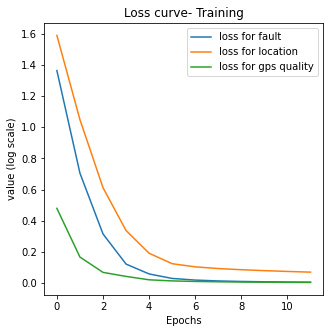

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Loss curve- Training")
plt.plot(model_history.history["fault_output_loss"], label="loss for fault")
plt.plot(model_history.history["location_output_loss"], label="loss for location")
plt.plot(model_history.history["gps_output_loss"], label="loss for gps quality")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

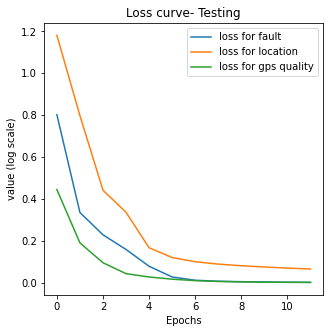

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Loss curve- Testing")
plt.plot(model_history.history["val_fault_output_loss"], label="loss for fault")
plt.plot(model_history.history["val_location_output_loss"], label="loss for location")
plt.plot(model_history.history["val_gps_output_loss"], label="loss for gps quality")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

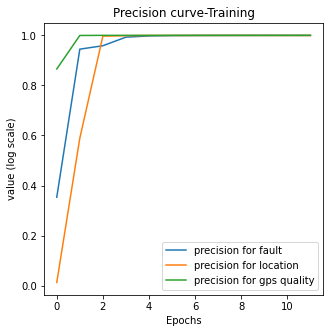

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Precision curve-Training")
plt.plot(model_history.history["fault_output_precision"], label="precision for fault")
plt.plot(model_history.history["location_output_precision_1"], label="precision for location")
plt.plot(model_history.history["gps_output_precision_2"], label="precision for gps quality")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

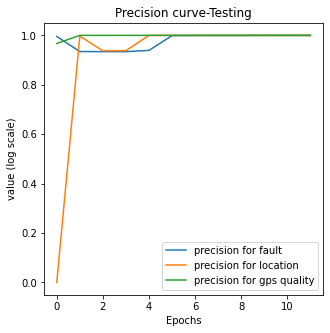

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Precision curve-Testing")
plt.plot(model_history.history["val_fault_output_precision"], label="precision for fault")
plt.plot(model_history.history["val_location_output_precision_1"], label="precision for location")
plt.plot(model_history.history["val_gps_output_precision_2"], label="precision for gps quality")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

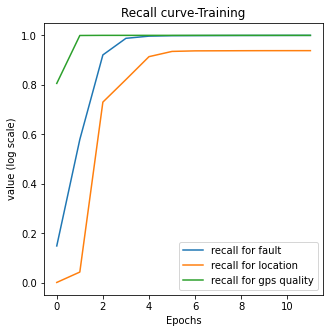

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Recall curve-Training")
plt.plot(model_history.history["fault_output_recall"], label="recall for fault")
plt.plot(model_history.history["location_output_recall_1"], label="recall for location")
plt.plot(model_history.history["gps_output_recall_2"], label="recall for gps quality")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

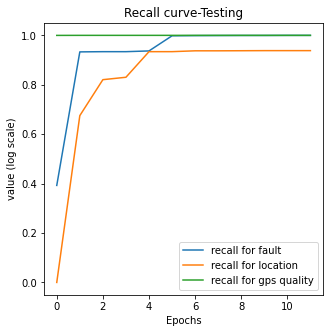

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Recall curve-Testing")
plt.plot(model_history.history["val_fault_output_recall"], label="recall for fault")
plt.plot(model_history.history["val_location_output_recall_1"], label="recall for location")
plt.plot(model_history.history["val_gps_output_recall_2"], label="recall for gps quality")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

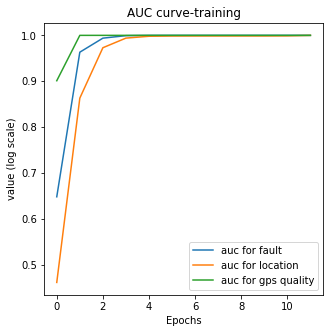

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("AUC curve-training")
plt.plot(model_history.history["fault_output_auc"], label="auc for fault")
plt.plot(model_history.history["location_output_auc_1"], label="auc for location")
plt.plot(model_history.history["gps_output_auc_2"], label="auc for gps quality")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

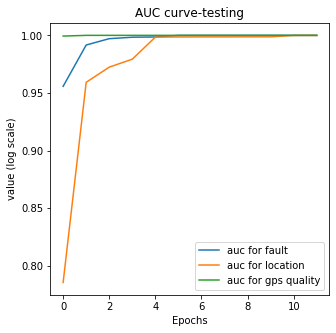

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("AUC curve-testing")
plt.plot(model_history.history["val_fault_output_auc"], label="auc for fault")
plt.plot(model_history.history["val_location_output_auc_1"], label="auc for location")
plt.plot(model_history.history["val_gps_output_auc_2"], label="auc for gps quality")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

In [55]:
model.save('metropt multitask ann model-1.h5')

20076/20076 [==============================] - 38s 2ms/step
fault classification CM-test


<Axes: >

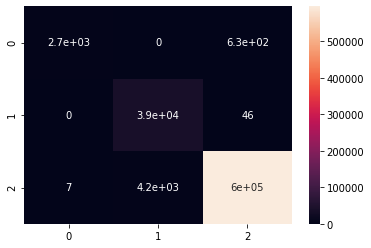

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
y_pred=model.predict(x_test)
y_pred_1= y_pred[0]
y_pred_2=y_pred[1]
y_pred_3=y_pred[2]
y_pred_1= np.argmax(y_pred_1,axis=1)
y_pred_2= np.argmax(y_pred_2,axis=1)
y_test1= np.argmax(y_test1,axis=1)
y_test2= np.argmax(y_test2,axis=1)
print('fault classification CM-test')
sns.heatmap(confusion_matrix(y_test1,y_pred_1), annot=True)

In [21]:
from sklearn.metrics import accuracy_score
y_pred_3=(y_pred_3>=0.5)
print(accuracy_score(y_pred_1,y_test1))
print(accuracy_score(y_pred_2,y_test2))
print(accuracy_score(y_pred_3,y_test3))

0.9923679331777759
0.9931524654393303
0.9999844338836993


location classification CM-test


<Axes: >

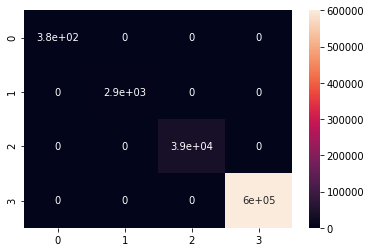

In [27]:
print('location classification CM-test')
sns.heatmap(confusion_matrix(y_test2,y_pred_2), annot=True)

gps quality classification CM-test


<Axes: >

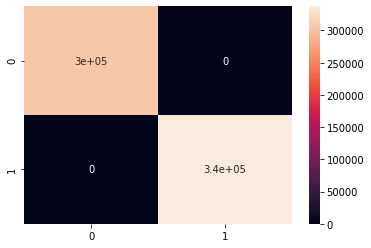

In [28]:
print('gps quality classification CM-test')
sns.heatmap(confusion_matrix(y_test3,y_pred_3), annot=True)

In [29]:
from sklearn.metrics import classification_report
print('fault classification classification report')
print(classification_report(y_test1,y_pred_1))

fault classification classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3324
           1       1.00      1.00      1.00     39097
           2       1.00      1.00      1.00    600000

    accuracy                           1.00    642421
   macro avg       0.99      1.00      1.00    642421
weighted avg       1.00      1.00      1.00    642421



In [30]:
print('location classification classification report')
print(classification_report(y_test2,y_pred_2))

location classification classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00      2944
           2       1.00      1.00      1.00     39097
           3       1.00      1.00      1.00    600000

    accuracy                           1.00    642421
   macro avg       1.00      1.00      1.00    642421
weighted avg       1.00      1.00      1.00    642421



In [31]:
print('gps quality classification classification report')
print(classification_report(y_test3,y_pred_3))

gps quality classification classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    304989
         1.0       1.00      1.00      1.00    337432

    accuracy                           1.00    642421
   macro avg       1.00      1.00      1.00    642421
weighted avg       1.00      1.00      1.00    642421

